## Consumir dados API- Company Overview - www.alphavantage.co

In [31]:
!pip install python-dotenv
!pip install requests

In [32]:
from dotenv import load_dotenv
import os

load_dotenv()

# Acessando as variáveis:
api_key = os.getenv('API_KEY')
base_url = os.getenv('BASE_URL_OVERVIEW')

In [33]:
import requests
import json

# Função para obter o resumo de uma empresa
def get_company_overview(symbol):
    url = f'{base_url}&symbol={symbol}&apikey={api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        if symbol in data['Symbol']:
            # Extract specific data points of interest
            company_name = data['Name']
            description = data['Description']
            sector = data['Sector']
            industry = data['Industry']
            market_cap = float(data['MarketCapitalization'])  # Assuming value is a string, convert to float if necessary
            # ... (extract other desired data points)

            # Print or return the extracted information
            print(f"Company Name: {company_name}")
            print(f"Description: {description}")
            print(f"Sector: {sector}")
            print(f"Industry: {industry}")
            print(f"Market Capitalization: {market_cap:,.2f}")  # Format market cap with commas and 2 decimal places
            # ... (print other extracted data points)

            return data  # Alternatively, return the entire overview dictionary
        else:
            print(f"Erro: 'Overview' não encontrado para {symbol}")
    else:
        print(f"Erro na requisição: {response.status_code}")
        return None
    
# Lista de símbolos das empresas
symbols = ['GOOGL', 'AAPL', 'NVDA']

# Loop para obter o resumo de cada empresa
for symbol in symbols:
    overview = get_company_overview(symbol)
    print(f"Resumo da {symbol}:")
    print(json.dumps(overview, indent=4))

Company Name: Alphabet Inc Class A
Description: Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and several former Google subsidiaries. The two co-founders of Google remained as controlling shareholders, board members, and employees at Alphabet. Alphabet is the world's fourth-largest technology company by revenue and one of the world's most valuable companies.
Sector: TECHNOLOGY
Industry: SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING, ETC.
Market Capitalization: 2,015,978,324,000.00
Resumo da GOOGL:
{
    "Symbol": "GOOGL",
    "AssetType": "Common Stock",
    "Name": "Alphabet Inc Class A",
    "Description": "Alphabet Inc. is an American multinational conglomerate headquartered in Mountain View, California. It was created through a restructuring of Google on October 2, 2015, and became the parent company of Google and severa

## Analise Técnica

### Construir gráficos para analisar o histórico dos preços das ações

In [34]:
!pip install yfinance

In [35]:
import yfinance as yf
import pandas as pd

In [36]:
# Obtendo dados históricos da Apple
#for symbol in symbols:
def obter_preco_acoes(symbol, start, end):
    return yf.download(symbol, start, end) 


In [37]:
start = input('Data inicio:')
end = input('Data fin: ')

# Criar um DataFrame para armazenar os dados
data = pd.DataFrame()

In [38]:
for symbol in symbols:
    df = obter_preco_acoes(symbol, start, end)
    df['symbol'] = symbol
    data = pd.concat([data, df])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#### Informações Básicas

In [39]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2024-03-01,138.429993,138.869995,136.919998,137.139999,136.982788,31119500,GOOGL
2024-03-04,135.660004,135.660004,131.910004,133.350006,133.197144,55999400,GOOGL
2024-03-05,131.880005,133.240005,130.669998,132.669998,132.517914,40194800,GOOGL
2024-03-06,133.119995,133.580002,130.850006,131.399994,131.249359,35318600,GOOGL
2024-03-07,132.789993,134.940002,131.610001,134.380005,134.225952,37738200,GOOGL


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2024-03-01 to 2024-07-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       312 non-null    float64
 1   High       312 non-null    float64
 2   Low        312 non-null    float64
 3   Close      312 non-null    float64
 4   Adj Close  312 non-null    float64
 5   Volume     312 non-null    int64  
 6   symbol     312 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 19.5+ KB


In [41]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02
mean,153.586718,155.430205,151.722817,153.574885,153.422428,1.760392e+08
std,41.432260,41.507275,41.527702,41.498134,41.405737,2.069389e+08
min,78.103996,80.072998,75.606003,76.199997,76.193741,1.024210e+07
25%,121.312498,123.332502,118.250000,121.615000,121.607498,3.111788e+07
50%,168.184998,169.290001,166.380005,168.050003,167.742889,5.831445e+07
75%,180.267502,182.549999,178.857498,180.000004,179.977505,3.145012e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,1.142269e+09


#### Candlestick

In [42]:
!pip install mplfinance

In [43]:
import mplfinance as mpf
import matplotlib.pyplot as plt

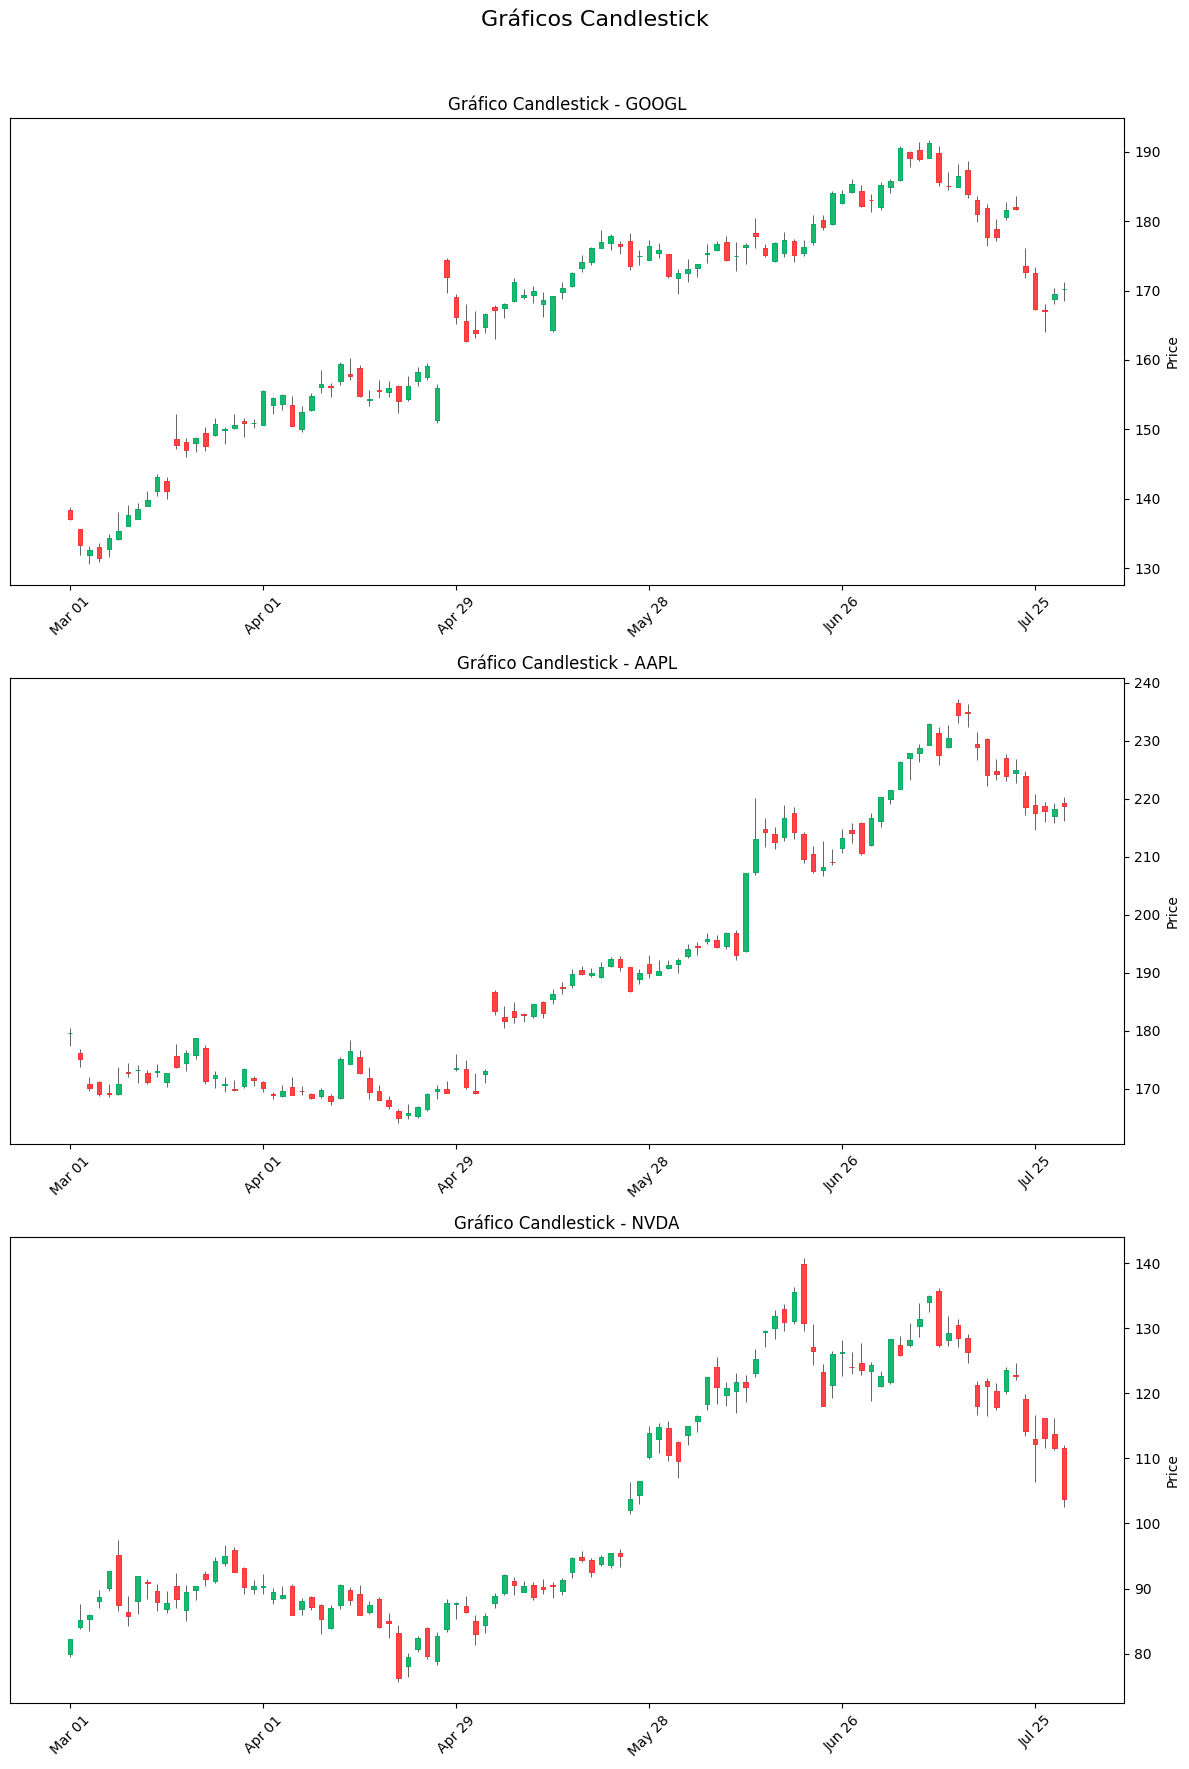

In [44]:

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(nrows=len(symbols), ncols=1, figsize=(12, 6 * len(symbols)))

# Ajusta o layout para evitar sobreposição
fig.tight_layout(pad=4.0)

# Se houver apenas um gráfico, axes será um único eixo, então transforme em uma lista
if len(symbols) == 1:
    axes = [axes]

# Configura os gráficos de candlestick para cada símbolo
for i, symbol in enumerate(symbols):
    # Verificar se o símbolo existe no DataFrame
    if symbol in data['symbol'].values:
        group = data[data['symbol'] == symbol]
        ax = axes[i]

        # Plota o gráfico de candlestick
        mpf.plot(group[['Open', 'High', 'Low', 'Close']], type='candle', style='yahoo', ax=ax)

        # Define o título do gráfico
        ax.set_title(f'Gráfico Candlestick - {symbol}', fontsize=12)
    else:
        print(f"O símbolo '{symbol}' não foi encontrado no DataFrame.")

# Adiciona um título geral para a figura
fig.suptitle('Gráficos Candlestick', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibir os gráficos
plt.show()